# 下载训练资料(使用 wiki Data)
## 主要以 pages-articles.xml.bz2 结尾的档案类型
* 维基资料集: https://zh.wikipedia.org/wiki/Wikipedia:%E6%95%B0%E6%8D%AE%E5%BA%93%E4%B8%8B%E8%BD%BD
* 以　[zhwiki-latest-pages-meta-current.xml.bz2　为训练集](https://dumps.wikimedia.org/zhwiki/latest/)。

# 将 Wiki 资料转为 txt(先下载 zhwiki-latest-pages-meta-current.xml.bz2 至与脚本同一个目录下)

In [1]:
# -*- coding: utf-8 -*-
import logging
import sys
import warnings
warnings.filterwarnings(action ='ignore', category = UserWarning, module = 'gensim')
from gensim.corpora import WikiCorpus

In [4]:
# 將 wiki 资料集下载后进行 xml convert to txt 
class Wiki_to_txt(object):

    def __init__(self):
        # 用默认 Formatter 为日志系统建立一个 StreamHandler ，设置基础配置并加到 root logger 中
        logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level = logging.INFO)

    # 使用方法 https://radimrehurek.com/gensim/corpora/wikicorpus.html
    def set_wiki_to_txt(self, wiki_data_path = None):
        if wiki_data_path == None:
            # 系統下參數
            if len(sys.argv) != 2:
                print("Please Usage: python3 " + sys.argv[0] + " wiki_data_path")
                exit()
            else:
                wiki_corpus = WikiCorpus(sys.argv[1], dictionary = {})
        else:
            wiki_corpus = WikiCorpus(wiki_data_path, dictionary = {})
        # wiki.xml convert to wiki.txt
        with open("wiki_text.txt", 'w', encoding = 'utf-8') as output:
            text_count = 0
            for text in wiki_corpus.get_texts():
                # save use string(gensim)
                output.write(' '.join(text) + '\n')
                text_count += 1
                if text_count % 10000 == 0:
                    logging.info("目前已处理 %d 篇文章" % text_count)
            print("转档完毕!")
            
if __name__ == "__main__":
    wiki_to_txt = Wiki_to_txt()
    # 將 wiki xml 转换成 wiki txt
    wiki_to_txt.set_wiki_to_txt("zhwiki-20190720-pages-articles-multistream.xml.bz2")


2019-09-17 22:14:23,301 : INFO : 目前已處理 10000 篇文章
2019-09-17 22:15:22,645 : INFO : 目前已處理 20000 篇文章
2019-09-17 22:16:16,247 : INFO : 目前已處理 30000 篇文章
2019-09-17 22:17:08,182 : INFO : 目前已處理 40000 篇文章
2019-09-17 22:18:00,716 : INFO : 目前已處理 50000 篇文章
2019-09-17 22:18:54,252 : INFO : 目前已處理 60000 篇文章
2019-09-17 22:19:43,995 : INFO : 目前已處理 70000 篇文章
2019-09-17 22:20:33,634 : INFO : 目前已處理 80000 篇文章
2019-09-17 22:21:23,820 : INFO : 目前已處理 90000 篇文章
2019-09-17 22:22:15,784 : INFO : 目前已處理 100000 篇文章
2019-09-17 22:23:21,740 : INFO : 目前已處理 110000 篇文章
2019-09-17 22:24:18,285 : INFO : 目前已處理 120000 篇文章
2019-09-17 22:25:17,263 : INFO : 目前已處理 130000 篇文章
2019-09-17 22:26:14,805 : INFO : 目前已處理 140000 篇文章
2019-09-17 22:27:12,829 : INFO : 目前已處理 150000 篇文章
2019-09-17 22:28:10,439 : INFO : 目前已處理 160000 篇文章
2019-09-17 22:29:08,844 : INFO : 目前已處理 170000 篇文章
2019-09-17 22:30:06,435 : INFO : 目前已處理 180000 篇文章
2019-09-17 22:33:33,277 : INFO : 目前已處理 190000 篇文章
2019-09-17 22:34:51,857 : INFO : 目前已處理 200000 篇文章
2019-09-1

轉檔完畢!


# 繁体转简体 -> 进行断词 -> 过滤[停用词](https://github.com/Alex-CHUN-YU/Word2vec/blob/master/stopwords.txt)

In [8]:
# -*- coding: utf-8 -*-
import jieba
import logging
from hanziconv import HanziConv

# 进行断词并过滤 stopword
class Segmentation(object):

    def __init__(self):
        # 用默认 Formatter 为日志系统建立一个 StreamHandler ，设置基础配置并加到 root logger 中
        logging.basicConfig(format = "%(asctime)s : %(levelname)s : %(message)s", level = logging.INFO)
        self.stopwordset = set()
        
    # 读取 stopword 词典，并存到 stopwordset
    def set_stopword(self):
        with open("stopwords.txt", "r", encoding = "utf-8") as stopwords:
            for stopword in stopwords:
                self.stopwordset.add(stopword.strip('\n'))
        #print(self.stopwordset)
        print("StopWord Set 已储存!")

    # 简 to 繁
    def traditional_to_simplified(self):
        logging.info("等待中..(繁 to 简)")
        simplified = open("simplified.txt", "w", encoding = "utf-8")      # 有新建simplified.txt的意思吗？？？
        with open("wiki_text.txt", "r", encoding = "utf-8") as traditional:
            for s in traditional:
                simplified.write(HanziConv.toSimplified(s))
        print("成功繁体转简体!")
        simplified.close()

    # 断词(Segmentation)并过滤掉停用词(Stop Word)
    def segmentation(self):
        logging.info("等待中..(jieba断词，并过滤停用词)")
        segmentation = open("segmentation.txt", "w", encoding = "utf-8")   
        with open("simplified.txt", "r", encoding = "utf-8") as Corpus:
            for sentence in Corpus:
                sentence = sentence.strip("\n")
                pos = jieba.cut(sentence, cut_all = False)
                for term in pos:
                    if term not in self.stopwordset:
                        segmentation.write(term + " ")
        print("jieba 断词完毕，并已完成过滤停用词!")
        segmentation.close()

if __name__ == "__main__":
    segmentation = Segmentation()
    # 读取停用词典
    segmentation.set_stopword()
    # data 进行繁体转简体
    segmentation.traditional_to_simplified()
    # 进行 jieba 断词同步過濾停用詞，并产生词典
    segmentation.segmentation()

2019-09-17 23:05:47,663 : INFO : 等待中..(繁 to 简)


StopWord Set 已储存!


2019-09-17 23:15:24,886 : INFO : 等待中..(jieba断词，并过滤停用词)
Building prefix dict from the default dictionary ...
2019-09-17 23:15:24,888 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lee\AppData\Local\Temp\jieba.cache
2019-09-17 23:15:24,893 : DEBUG : Loading model from cache C:\Users\Lee\AppData\Local\Temp\jieba.cache


成功繁体转简体!


Loading model cost 0.988 seconds.
2019-09-17 23:15:25,879 : DEBUG : Loading model cost 0.988 seconds.
Prefix dict has been built succesfully.
2019-09-17 23:15:25,882 : DEBUG : Prefix dict has been built succesfully.


jieba 断词完毕，并已完成过滤停用词!


In [ ]:
import logging
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning, module = 'gensim')
from gensim.models import word2vec
print("训练中...(休息一下吧^0^)")
logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
sentences = word2vec.LineSentence(u'C:/Users/Lee/Downloads/Word2Vec/the_others_way/segmentation.txt')
model = word2vec.Word2Vec(sentences,size=200,window=5,min_count=5)
outp1 = 'wiki.zh.text.model'
model.save(outp1)
model.wv.save_word2vec_format(u"wiki200.model.bin", binary = True)

## 通过 Gensim Word2Vec 來进行训练(这边使用 cbow 模型，Dimension 设为 200 维度)

In [4]:
# -*- coding: utf-8 -*-
import logging
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning, module = 'gensim')
from gensim.models import word2vec


# 可參考 https://radimrehurek.com/gensim/models/word2vec.html 更多运用
def train():
    print("训练中...(休息一下吧^0^)")
    # Load file
    logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
        
    sentence = word2vec.Text8Corpus("segmentation.txt")   #sentences = word2vec.LineSentence(u'C:/Users/Lee/Downloads/Word2Vec/the_others_way/segmentation.txt')
    # Setting degree and Produce Model(Train)
    return sentence 



In [6]:
sentence = train()
model = word2vec.Word2Vec(sentence, size = 200, window = 5, min_count = 3000, workers = 4, sg = 0)
model.save("C:/Users/Lee/Downloads/Word2Vec/wiki_corpus.model")    
model.wv.save_word2vec_format(u"wiki3000.model.bin", binary = True)     
one_corpus = ["美丽"]
res = model.most_similar(one_corpus[0],topn = 50)
print(res)



2019-10-06 19:13:08,663:INFO:collecting all words and their counts
2019-10-06 19:13:08,667:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


训练中...(休息一下吧^0^)


2019-10-06 19:14:15,313:INFO:PROGRESS: at sentence #10000, processed 100000000 words, keeping 2503623 word types
2019-10-06 19:15:07,770:INFO:collected 3542498 word types from a corpus of 177835776 raw words and 17784 sentences
2019-10-06 19:15:07,772:INFO:Loading a fresh vocabulary
2019-10-06 19:15:09,902:INFO:effective_min_count=3000 retains 8066 unique words (0% of original 3542498, drops 3534432)
2019-10-06 19:15:09,903:INFO:effective_min_count=3000 leaves 108288139 word corpus (60% of original 177835776, drops 69547637)
2019-10-06 19:15:09,968:INFO:deleting the raw counts dictionary of 3542498 items
2019-10-06 19:15:10,194:INFO:sample=0.001 downsamples 15 most-common words
2019-10-06 19:15:10,195:INFO:downsampling leaves estimated 105061676 word corpus (97.0% of prior 108288139)
2019-10-06 19:15:10,239:INFO:estimated required memory for 8066 words and 200 dimensions: 16938600 bytes
2019-10-06 19:15:10,240:INFO:resetting layer weights
2019-10-06 19:15:10,429:INFO:training model wit

2019-10-06 19:16:17,978:INFO:EPOCH 1 - PROGRESS: at 36.34% examples, 557953 words/s, in_qsize 0, out_qsize 1
2019-10-06 19:16:18,982:INFO:EPOCH 1 - PROGRESS: at 36.88% examples, 558195 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:19,984:INFO:EPOCH 1 - PROGRESS: at 37.43% examples, 558366 words/s, in_qsize 2, out_qsize 0
2019-10-06 19:16:20,985:INFO:EPOCH 1 - PROGRESS: at 38.00% examples, 558943 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:21,986:INFO:EPOCH 1 - PROGRESS: at 38.57% examples, 559401 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:22,988:INFO:EPOCH 1 - PROGRESS: at 39.14% examples, 559995 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:24,001:INFO:EPOCH 1 - PROGRESS: at 39.72% examples, 560377 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:25,001:INFO:EPOCH 1 - PROGRESS: at 40.28% examples, 560706 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:26,008:INFO:EPOCH 1 - PROGRESS: at 40.86% examples, 561047 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:16:27

2019-10-06 19:17:34,619:INFO:EPOCH 1 - PROGRESS: at 77.46% examples, 563239 words/s, in_qsize 4, out_qsize 1
2019-10-06 19:17:35,621:INFO:EPOCH 1 - PROGRESS: at 77.95% examples, 563117 words/s, in_qsize 7, out_qsize 0
2019-10-06 19:17:36,625:INFO:EPOCH 1 - PROGRESS: at 78.48% examples, 563137 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:17:37,633:INFO:EPOCH 1 - PROGRESS: at 79.03% examples, 563186 words/s, in_qsize 4, out_qsize 1
2019-10-06 19:17:38,644:INFO:EPOCH 1 - PROGRESS: at 79.55% examples, 562977 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:17:39,646:INFO:EPOCH 1 - PROGRESS: at 80.12% examples, 563388 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:17:40,656:INFO:EPOCH 1 - PROGRESS: at 80.64% examples, 563330 words/s, in_qsize 4, out_qsize 0
2019-10-06 19:17:41,673:INFO:EPOCH 1 - PROGRESS: at 81.20% examples, 563616 words/s, in_qsize 4, out_qsize 0
2019-10-06 19:17:42,679:INFO:EPOCH 1 - PROGRESS: at 81.71% examples, 563525 words/s, in_qsize 3, out_qsize 0
2019-10-06 19:17:43

2019-10-06 19:18:46,766:INFO:EPOCH 2 - PROGRESS: at 17.36% examples, 573298 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:18:47,779:INFO:EPOCH 2 - PROGRESS: at 17.94% examples, 573763 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:18:48,785:INFO:EPOCH 2 - PROGRESS: at 18.51% examples, 574234 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:18:49,788:INFO:EPOCH 2 - PROGRESS: at 18.97% examples, 571656 words/s, in_qsize 6, out_qsize 1
2019-10-06 19:18:50,800:INFO:EPOCH 2 - PROGRESS: at 19.48% examples, 570084 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:18:51,838:INFO:EPOCH 2 - PROGRESS: at 20.02% examples, 569413 words/s, in_qsize 4, out_qsize 0
2019-10-06 19:18:52,847:INFO:EPOCH 2 - PROGRESS: at 20.59% examples, 569623 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:18:53,853:INFO:EPOCH 2 - PROGRESS: at 21.07% examples, 567716 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:18:54,876:INFO:EPOCH 2 - PROGRESS: at 21.55% examples, 565396 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:18:55

2019-10-06 19:20:03,437:INFO:EPOCH 2 - PROGRESS: at 58.60% examples, 566147 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:04,440:INFO:EPOCH 2 - PROGRESS: at 59.17% examples, 566342 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:05,444:INFO:EPOCH 2 - PROGRESS: at 59.73% examples, 566478 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:06,447:INFO:EPOCH 2 - PROGRESS: at 60.31% examples, 566646 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:07,453:INFO:EPOCH 2 - PROGRESS: at 60.90% examples, 566851 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:08,453:INFO:EPOCH 2 - PROGRESS: at 61.48% examples, 567165 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:09,454:INFO:EPOCH 2 - PROGRESS: at 62.05% examples, 567363 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:10,461:INFO:EPOCH 2 - PROGRESS: at 62.61% examples, 567558 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:11,465:INFO:EPOCH 2 - PROGRESS: at 63.19% examples, 567765 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:20:12

2019-10-06 19:21:17,743:INFO:worker thread finished; awaiting finish of 1 more threads
2019-10-06 19:21:17,750:INFO:worker thread finished; awaiting finish of 0 more threads
2019-10-06 19:21:17,752:INFO:EPOCH - 2 : training on 177835776 raw words (105061271 effective words) took 182.2s, 576552 effective words/s
2019-10-06 19:21:18,760:INFO:EPOCH 3 - PROGRESS: at 0.53% examples, 556540 words/s, in_qsize 7, out_qsize 0
2019-10-06 19:21:19,764:INFO:EPOCH 3 - PROGRESS: at 1.03% examples, 541614 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:21:20,768:INFO:EPOCH 3 - PROGRESS: at 1.57% examples, 544870 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:21:21,771:INFO:EPOCH 3 - PROGRESS: at 2.12% examples, 549624 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:21:22,786:INFO:EPOCH 3 - PROGRESS: at 2.68% examples, 548682 words/s, in_qsize 0, out_qsize 1
2019-10-06 19:21:23,794:INFO:EPOCH 3 - PROGRESS: at 3.26% examples, 555848 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:21:24,801:INFO:EPOCH 3 - 

2019-10-06 19:22:32,287:INFO:EPOCH 3 - PROGRESS: at 41.51% examples, 577918 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:22:33,297:INFO:EPOCH 3 - PROGRESS: at 42.09% examples, 578111 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:22:34,305:INFO:EPOCH 3 - PROGRESS: at 42.68% examples, 578425 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:22:35,305:INFO:EPOCH 3 - PROGRESS: at 43.26% examples, 578713 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:22:36,312:INFO:EPOCH 3 - PROGRESS: at 43.84% examples, 578898 words/s, in_qsize 1, out_qsize 0
2019-10-06 19:22:37,319:INFO:EPOCH 3 - PROGRESS: at 44.41% examples, 579164 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:22:38,331:INFO:EPOCH 3 - PROGRESS: at 44.99% examples, 579334 words/s, in_qsize 0, out_qsize 1
2019-10-06 19:22:39,338:INFO:EPOCH 3 - PROGRESS: at 45.52% examples, 578641 words/s, in_qsize 5, out_qsize 1
2019-10-06 19:22:40,352:INFO:EPOCH 3 - PROGRESS: at 46.03% examples, 577897 words/s, in_qsize 2, out_qsize 0
2019-10-06 19:22:41

2019-10-06 19:23:48,869:INFO:EPOCH 3 - PROGRESS: at 83.81% examples, 582659 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:23:49,871:INFO:EPOCH 3 - PROGRESS: at 84.38% examples, 582723 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:23:50,873:INFO:EPOCH 3 - PROGRESS: at 84.95% examples, 582861 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:23:51,877:INFO:EPOCH 3 - PROGRESS: at 85.50% examples, 582936 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:23:52,897:INFO:EPOCH 3 - PROGRESS: at 86.07% examples, 583003 words/s, in_qsize 1, out_qsize 1
2019-10-06 19:23:53,910:INFO:EPOCH 3 - PROGRESS: at 86.53% examples, 582462 words/s, in_qsize 3, out_qsize 0
2019-10-06 19:23:54,912:INFO:EPOCH 3 - PROGRESS: at 87.05% examples, 582329 words/s, in_qsize 7, out_qsize 0
2019-10-06 19:23:55,927:INFO:EPOCH 3 - PROGRESS: at 87.52% examples, 581776 words/s, in_qsize 2, out_qsize 0
2019-10-06 19:23:56,929:INFO:EPOCH 3 - PROGRESS: at 88.08% examples, 581842 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:23:57

2019-10-06 19:25:00,395:INFO:EPOCH 4 - PROGRESS: at 23.05% examples, 576565 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:25:01,418:INFO:EPOCH 4 - PROGRESS: at 23.62% examples, 576817 words/s, in_qsize 1, out_qsize 1
2019-10-06 19:25:02,421:INFO:EPOCH 4 - PROGRESS: at 24.22% examples, 577595 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:25:03,423:INFO:EPOCH 4 - PROGRESS: at 24.72% examples, 576493 words/s, in_qsize 5, out_qsize 1
2019-10-06 19:25:04,424:INFO:EPOCH 4 - PROGRESS: at 25.22% examples, 575578 words/s, in_qsize 5, out_qsize 1
2019-10-06 19:25:05,429:INFO:EPOCH 4 - PROGRESS: at 25.79% examples, 575880 words/s, in_qsize 3, out_qsize 0
2019-10-06 19:25:06,439:INFO:EPOCH 4 - PROGRESS: at 26.32% examples, 575295 words/s, in_qsize 4, out_qsize 0
2019-10-06 19:25:07,449:INFO:EPOCH 4 - PROGRESS: at 26.90% examples, 575940 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:25:08,462:INFO:EPOCH 4 - PROGRESS: at 27.49% examples, 576326 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:25:09

2019-10-06 19:26:16,928:INFO:EPOCH 4 - PROGRESS: at 65.86% examples, 582771 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:26:17,937:INFO:EPOCH 4 - PROGRESS: at 66.44% examples, 583218 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:26:18,943:INFO:EPOCH 4 - PROGRESS: at 66.99% examples, 583742 words/s, in_qsize 7, out_qsize 0
2019-10-06 19:26:19,962:INFO:EPOCH 4 - PROGRESS: at 67.56% examples, 585113 words/s, in_qsize 6, out_qsize 1
2019-10-06 19:26:20,966:INFO:EPOCH 4 - PROGRESS: at 68.12% examples, 585266 words/s, in_qsize 1, out_qsize 1
2019-10-06 19:26:21,976:INFO:EPOCH 4 - PROGRESS: at 68.72% examples, 585505 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:26:23,010:INFO:EPOCH 4 - PROGRESS: at 69.27% examples, 585201 words/s, in_qsize 7, out_qsize 0
2019-10-06 19:26:24,034:INFO:EPOCH 4 - PROGRESS: at 69.78% examples, 584608 words/s, in_qsize 4, out_qsize 1
2019-10-06 19:26:25,041:INFO:EPOCH 4 - PROGRESS: at 70.34% examples, 584601 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:26:26

2019-10-06 19:27:28,588:INFO:EPOCH 5 - PROGRESS: at 5.30% examples, 541390 words/s, in_qsize 4, out_qsize 1
2019-10-06 19:27:29,611:INFO:EPOCH 5 - PROGRESS: at 5.86% examples, 544151 words/s, in_qsize 5, out_qsize 2
2019-10-06 19:27:30,622:INFO:EPOCH 5 - PROGRESS: at 6.41% examples, 546081 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:31,625:INFO:EPOCH 5 - PROGRESS: at 6.98% examples, 549393 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:32,632:INFO:EPOCH 5 - PROGRESS: at 7.55% examples, 551359 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:33,637:INFO:EPOCH 5 - PROGRESS: at 8.13% examples, 553820 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:34,648:INFO:EPOCH 5 - PROGRESS: at 8.72% examples, 555764 words/s, in_qsize 0, out_qsize 1
2019-10-06 19:27:35,648:INFO:EPOCH 5 - PROGRESS: at 9.29% examples, 557332 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:36,667:INFO:EPOCH 5 - PROGRESS: at 9.87% examples, 558486 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:27:37,668:INFO

2019-10-06 19:28:45,070:INFO:EPOCH 5 - PROGRESS: at 47.67% examples, 570752 words/s, in_qsize 1, out_qsize 0
2019-10-06 19:28:46,076:INFO:EPOCH 5 - PROGRESS: at 48.23% examples, 570992 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:28:47,077:INFO:EPOCH 5 - PROGRESS: at 48.75% examples, 570716 words/s, in_qsize 6, out_qsize 0
2019-10-06 19:28:48,087:INFO:EPOCH 5 - PROGRESS: at 49.25% examples, 570086 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:28:49,098:INFO:EPOCH 5 - PROGRESS: at 49.83% examples, 570387 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:28:50,103:INFO:EPOCH 5 - PROGRESS: at 50.37% examples, 570408 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:28:51,113:INFO:EPOCH 5 - PROGRESS: at 50.90% examples, 570263 words/s, in_qsize 3, out_qsize 2
2019-10-06 19:28:52,118:INFO:EPOCH 5 - PROGRESS: at 51.48% examples, 570539 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:28:53,132:INFO:EPOCH 5 - PROGRESS: at 52.04% examples, 570674 words/s, in_qsize 3, out_qsize 0
2019-10-06 19:28:54

2019-10-06 19:30:01,754:INFO:EPOCH 5 - PROGRESS: at 89.72% examples, 577823 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:30:02,759:INFO:EPOCH 5 - PROGRESS: at 90.28% examples, 577858 words/s, in_qsize 1, out_qsize 0
2019-10-06 19:30:03,767:INFO:EPOCH 5 - PROGRESS: at 90.85% examples, 577945 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:30:04,766:INFO:EPOCH 5 - PROGRESS: at 91.41% examples, 578040 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:30:05,778:INFO:EPOCH 5 - PROGRESS: at 91.98% examples, 578105 words/s, in_qsize 1, out_qsize 0
2019-10-06 19:30:06,785:INFO:EPOCH 5 - PROGRESS: at 92.52% examples, 578037 words/s, in_qsize 8, out_qsize 0
2019-10-06 19:30:07,817:INFO:EPOCH 5 - PROGRESS: at 93.04% examples, 577723 words/s, in_qsize 7, out_qsize 1
2019-10-06 19:30:08,830:INFO:EPOCH 5 - PROGRESS: at 93.59% examples, 577598 words/s, in_qsize 6, out_qsize 1
2019-10-06 19:30:09,832:INFO:EPOCH 5 - PROGRESS: at 94.17% examples, 577724 words/s, in_qsize 0, out_qsize 0
2019-10-06 19:30:10

[('美好', 0.6260364055633545), ('爱', 0.5857315063476562), ('幸福', 0.5800032615661621), ('人生', 0.5767568349838257), ('亲爱', 0.5680204033851624), ('女人', 0.5482527017593384), ('勇敢', 0.5379863977432251), ('温柔', 0.5330031514167786), ('爱情', 0.5267357230186462), ('阳光', 0.5119426846504211), ('可爱', 0.507407009601593), ('微笑', 0.5034418106079102), ('寂寞', 0.5028645992279053), ('完美', 0.5004754066467285), ('男人', 0.49128207564353943), ('浪漫', 0.48130476474761963), ('之恋', 0.47921285033226013), ('夏日', 0.47162073850631714), ('孤独', 0.4691161513328552), ('热情', 0.46810460090637207), ('温暖', 0.46635907888412476), ('爱人', 0.4651455283164978), ('心', 0.464870810508728), ('天堂', 0.46431583166122437), ('魅力', 0.46302545070648193), ('开心', 0.4625187814235687), ('青春', 0.4603939950466156), ('善良', 0.45989102125167847), ('新世界', 0.4593294858932495), ('华丽', 0.4530939757823944), ('玫瑰', 0.4515562057495117), ('女孩', 0.450690895318985), ('快乐', 0.4486050009727478), ('充满', 0.4450792670249939), ('天空', 0.44182780385017395), ('爱上', 0.4415

NameError: name 'np' is not defined

# 将训练好的 Model 进行测试

In [3]:
# -*- coding: utf-8 -*-
#相似度测试
import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning, module = 'gensim')
from gensim.models.keyedvectors import KeyedVectors     #       word_vectors = KeyedVectors.load_word2vec_format("wiki300.model.bin", binary = True)
                                                         #       res = word_vectors.wv.most_similar('爸爸', topn = 10)
from gensim import models
import numpy as np
import matplotlib.pyplot as plt

# 载入 model 并使用
def main():
    # 可參考 https://radimrehurek.com/gensim/models/word2vec.html 更多运用
    # How to use bin(model)?
    model = models.Word2Vec.load("C:/Users/Lee/Downloads/Word2Vec/wiki_corpus.model")
    one_corpus = ["美丽"]
   # print("请输入想查询相似度的短语")
   # one_corpus[0] = input('>')
    res = model.most_similar(one_corpus[0],topn = 50)
    print(res)
    #print("%d 前50名相似:" % one_corpus[0])    
    for item in res:
        print(item[0] + "," + str(item[1]))  
    return res
   
    

if __name__ == "__main__":
    main()

[('美好', 0.6260364055633545), ('爱', 0.5857315063476562), ('幸福', 0.5800032615661621), ('人生', 0.5767568349838257), ('亲爱', 0.5680204033851624), ('女人', 0.5482527017593384), ('勇敢', 0.5379863977432251), ('温柔', 0.5330031514167786), ('爱情', 0.5267357230186462), ('阳光', 0.5119426846504211), ('可爱', 0.507407009601593), ('微笑', 0.5034418106079102), ('寂寞', 0.5028645992279053), ('完美', 0.5004754066467285), ('男人', 0.49128207564353943), ('浪漫', 0.48130476474761963), ('之恋', 0.47921285033226013), ('夏日', 0.47162073850631714), ('孤独', 0.4691161513328552), ('热情', 0.46810460090637207), ('温暖', 0.46635907888412476), ('爱人', 0.4651455283164978), ('心', 0.464870810508728), ('天堂', 0.46431583166122437), ('魅力', 0.46302545070648193), ('开心', 0.4625187814235687), ('青春', 0.4603939950466156), ('善良', 0.45989102125167847), ('新世界', 0.4593294858932495), ('华丽', 0.4530939757823944), ('玫瑰', 0.4515562057495117), ('女孩', 0.450690895318985), ('快乐', 0.4486050009727478), ('充满', 0.4450792670249939), ('天空', 0.44182780385017395), ('爱上', 0.4415

H:\Anaconda3\anzhuang\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).


In [ ]:
可在main函数下加入以下程序段："""
    print("\n'爸爸','妈妈'之间相似度:")
    res = model.similarity('爸爸', '妈妈')
    print(res)
    print("\n'爸爸'之于'老公',如'妈妈'之于'老婆':")
    res = model.most_similar(positive = ['爸爸', '老公'], negative = ['妈妈'], topn = 5)
    for item in res:
        print(item[0] + "," + str(item[1]))
        """

### 绘制词云

H:\Anaconda3\anzhuang\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


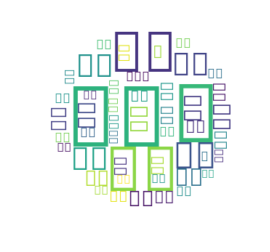

In [8]:
from wordcloud import WordCloud  # wordcloud包安装及使用见 https://blog.csdn.net/qq_22499377/article/details/79207282  
                                                         #  https://kuaibao.qq.com/s/20180918G1YC3I00?refer=cp_1026
                                                         # https://blog.csdn.net/Noah_orz/article/details/81132976  https://www.cnblogs.com/nice-forever/p/5371906.html
                                                         # https://jingyan.baidu.com/article/3d69c5513f0052f0ce02d76d.html
model = models.Word2Vec.load("C:/Users/Lee/Downloads/Word2Vec/wiki_corpus.model")
res = model.most_similar(["美丽"],topn = 50)
#获取一个圆形的mask
def get_mask():
    x,y = np.ogrid[:300,:300]#ogrid生成二维数组，第一个数组是以纵向产生的，即数组第二维的大小始终为1。第二个数组是以横向产生的，即数组第一维的大小始终为1
    mask = (x-150) ** 2 + (y-150)**2 > 130 ** 2
    mask = 255 * mask.astype(int)
    return mask
#绘制词云
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color="white",mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc,interpolation="bilinear")
    plt.show()
word_cloud_dic = dict()
for s in res:
    word_cloud_dic[s[0]] = s[1]
draw_word_cloud(word_cloud_dic)

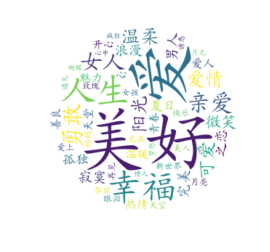

In [9]:
font = "H:/Anaconda3/anzhuang/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/simkai.ttf"

def draw_word_cloud(word_cloud):
    wc = WordCloud(font_path = font,background_color="white",mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc,interpolation="bilinear")
    plt.show()
draw_word_cloud(word_cloud_dic)
#WordCloud方法输出中文必须指定font_path,不然中文显是不了

In [22]:
i = 0
for item in res:
    print(item[0] ,":" , str(item[1])) 
    i += 1
    if i > 5:
        break

美好 : 0.6260364055633545
爱 : 0.5857315063476562
幸福 : 0.5800032615661621
人生 : 0.5767568349838257
亲爱 : 0.5680204033851624
女人 : 0.5482527017593384


In [23]:
#查看单个词语的词向量
print(model.wv['美丽']) 

[ 4.6418113e-01  6.6669241e-02  1.2581034e+00 -2.3947708e-02
  1.0958220e+00 -5.5730331e-01 -2.6048842e-01  7.0224011e-01
 -4.5286009e-01 -1.6715087e+00 -1.3045083e+00  3.8376376e-01
  2.2021411e-02  1.6317304e+00 -1.4767895e+00 -1.5658587e-01
 -5.0403291e-01  1.1312294e+00  8.1292999e-01 -7.9173851e-01
  2.5626656e-01  2.7178332e-01  8.3260131e-01  1.4174415e+00
 -9.1413923e-02 -1.3259844e+00 -1.7161136e+00 -8.1062514e-01
 -7.1697181e-01 -1.3375992e-01  3.5511008e-01 -2.9008585e-01
 -1.5346737e-01 -2.4912938e-01  8.1973708e-01 -1.2426710e+00
  5.0845885e-01  3.8067150e-01  7.6879047e-02 -2.4205308e+00
  2.6595351e-01 -5.0102329e-01  1.7886177e+00 -3.5852447e-01
 -2.5785771e-01 -1.0430123e+00  3.9341483e-01  2.5944269e+00
  2.1990728e+00  8.3219081e-01  1.3318776e+00 -1.0834743e-01
  1.4939060e+00  2.2378330e+00 -2.0196829e+00  1.2813576e+00
  6.4825094e-01  5.1058316e-01 -1.0341700e+00 -3.4819499e-01
 -6.6857713e-01 -8.5140564e-02  3.7765664e-01 -8.6542624e-01
 -2.4195261e-01 -1.41159

In [24]:
plt.annotate

<function matplotlib.pyplot.annotate(s, xy, *args, **kwargs)>

In [25]:
from sklearn.manifold import TSNE
from matplotlib.font_manager import FontProperties

ttf =  "H:/Anaconda3/anzhuang/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/simkai.ttf"
font = FontProperties(fname=r"H:/Anaconda3/anzhuang/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/simkai.ttf", size=14)#不设置改参数显示中文乱码
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    #plot_only = 1000
    #new_values = tsne_model.fit_transform(tokens[:plot_only, :])
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     fontproperties=font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

H:\Anaconda3\anzhuang\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


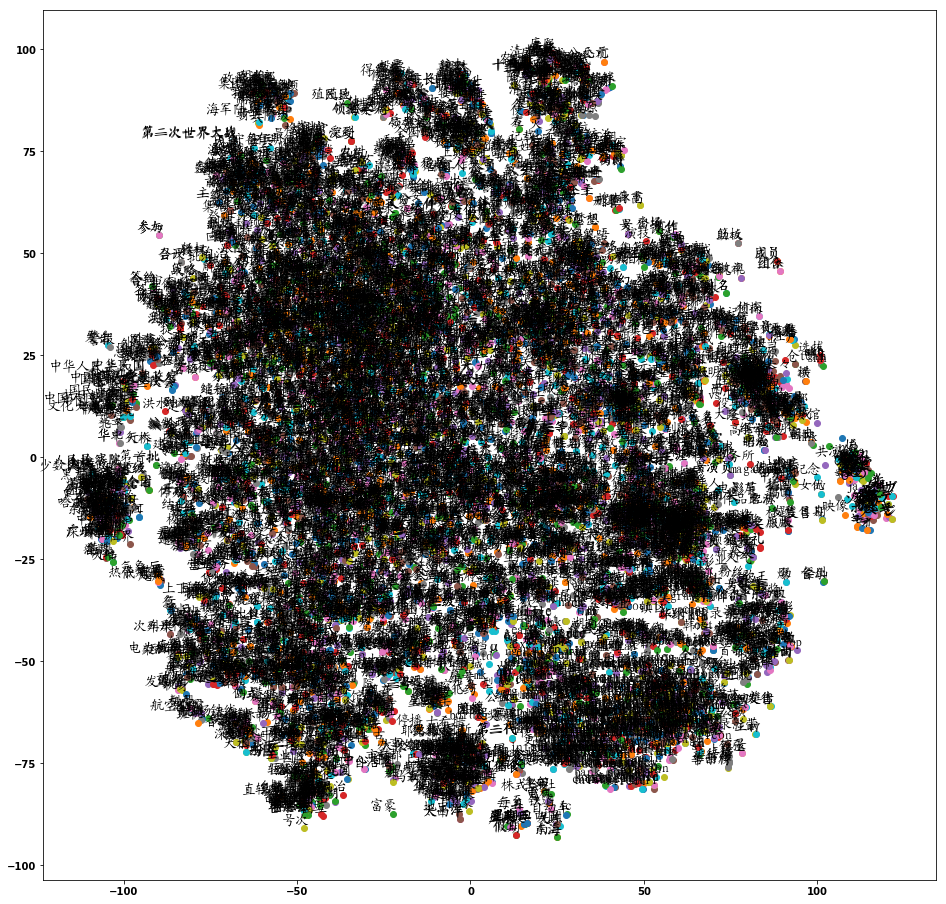

In [26]:
tsne_plot(model)

# 其他操作

wordcloud安装参考：
https://blog.csdn.net/zouqican/article/details/80331542
https://cloud.tencent.com/developer/ask/138308

使用：
https://blog.csdn.net/Amdrose/article/details/81506689
https://blog.csdn.net/tanzuozhev/article/details/50789226

In [ ]:
import pip._internal
print(pip._internal.pep425tags.get_supported())
#import pip
#print(pip.pep425tags.get_supported())

In [13]:
pip install --upgrade setuptools

Requirement already up-to-date: setuptools in h:\anaconda3\anzhuang\lib\site-packages (41.2.0)
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade pip

Requirement already up-to-date: pip in h:\anaconda3\anzhuang\lib\site-packages (19.2.3)
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install -c conda-forge wordcloud=1.5.0

Solving environment: ...working... done

## Package Plan ##

  environment location: H:\Anaconda3\anzhuang

  added / updated specs:
    - wordcloud=1.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.3.9           |           py37_0         149 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.6.0|   py37h2fa13f4_0         733 KB  conda-forge
    wordcloud-1.5.0            |py37hfa6e2cd_1000         185 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/win-64::conda-package-handling-1.6.0-py37h2fa13f4_0
  wordcloud          conda-forge/win-64::wordcloud-1.5.0-py37hfa6e2cd_1000

The following packages will be UPDATED:

  cond



==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda


'ET' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [ ]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud=1.5.0

### 软件包安装参考链接
+ https://blog.csdn.net/qq_38923076/article/details/82957244
+ https://www.cnblogs.com/hellojiaojiao/p/10790273.html


In [2]:
conda install mingw libpython 

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - mingw

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
conda install -c conda-forge gensim


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
ConnectionError(ReadTimeoutError("HTTPSConnectionPool(host='conda.anaconda.org', port=443): Read timed out."))




### 其他问题
+ 1.乱码
  WordCloud需要设置font_path = "H:/Anaconda3/anzhuang/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/simkai.ttf"
  matplotlib.pyplot需要设置FontProperties
  font = FontProperties(fname=r"H:/Anaconda3/anzhuang/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/simkai.ttf", size=14)
+ 2.训练模型运行速度特别慢
   UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
  重新配置了python的C扩展
+ 3.训练模型及绘制上面云图时，如果min_count设置太小，运行很慢；作业中我把min_count设置成1000进行的训练。


## 词云参考资料
+ https://blog.csdn.net/Amdrose/article/details/81506689
+ https://blog.csdn.net/tanzuozhev/article/details/50789226
+ https://blog.csdn.net/zouqican/article/details/80331542
### ！！！
+ https://www.wandouip.com/t5i401025/
+ https://www.cnblogs.com/byugo/p/11300233.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

# 方法二：

## 使用 gensim 训练中文词向量 (word2vec)

本部分参考：https://www.kesci.com/home/project/5b7a35c131902f000f551567

word2vec算法通过将语词(word)映射到N维的向量空间，然后基于这个词向量可以进行聚类，找到近似词以及词性分析等相关的应用。

关于word2vec原理和核心算法CBOW（Continuous Bag-Of- Words），Skip-Gram在 《Word2vec 詞嵌入 (word embeddings) 的基本概念》（地址：https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/8.2-word2vec-concept-introduction.ipynb）
已经进行了解释，不过对如何训练word2vec的模型并没有太多着墨。

这篇文章里将使用维基百科的中文语料，并使用python的gensim套件来训练word2vec的模型。

## 一、安裝

### 1.安装Anaconda
### 2.产生一个Anaconda环境
### 3.安装库:

In [ ]:
pip install gensim

In [ ]:
pip install jieba

In [ ]:
pip install hanziconv

## 二、下载训练用的相关脚本

1.下載Alex-CHUN-YU/Word2vec的Github文件夹
git clone https://github.com/Alex-CHUN-YU/Word2vec.git

下载中文维基百科数据
到 中文维基百科dump 的目录下找到最新的dump资料档zhwiki-yyyymmdd-pages-articles.xml.bz2, 比如zhwiki-20180220-pages-articles.xml.bz2 (1.4 GB)到'Word2vec/data'的子目录下

下载jieba字典
以"Download ZIP"的方式下载 fxsjy/jieba, 解压后將"extra_dict"整个目录复制到"Word2vec/model"子目录下
+ 下载地址：https://github.com/fxsjy/jieba

库的结构
你的目录结构看起来像这样: (这里只列出来在这个范例会用到的相关档案与目录)

Word2vec/
├──xxxx.ipynb (代表本例的notebook)
├── main.py
├── segmentation.py
├── train.py
├── wiki_to_txt.py
├── stopwords.txt
├── model/
│   └── extra_dict
│       ├── dict.txt.big
│       ├── dict.txt.small
│       ├── idf.txt.big
│       └── stop_words.txt
└── data/
    └── zhwiki-20180220-pages-articles.xml.bz2

## 三、训练流程
取得中文维基数据，本次实验是采用 2018/02/20 的数据。
将下载后的维基数据置于与"data/"子目录，再使用gensim.corpora的WikiCorpus函数来从wiki的xml档案中提取出维基文章的语词
简体转繁体，再进行断词并同步过滤停用词
训练并产生 word2vec 模型
验证word2vec近似词以及词性分析等相关功能

载入相关库

In [ ]:
!pip install  hanziconv 

In [10]:
# 把一些警告的讯息暂时关掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相关库
import os
import numpy as np
import mmap
from tqdm import tqdm

# 可视化相关库
import jieba
from gensim.corpora import WikiCorpus
from gensim.models import word2vec
from hanziconv import HanziConv
import matplotlib.pyplot as plt

### 参数设定

In [ ]:
# 文档的根目录路径
ROOT_DIR = os.getcwd()

# 训练/验证用的文档路径
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 模型目录
MODEL_PATH = os.path.join(ROOT_DIR, "model")

# 设定jieba自定义字典路径
JIEBA_DICTFILE_PATH = os.path.join(MODEL_PATH,"extra_dict", "dict.txt.big")

# 设定字典
jieba.set_dictionary(JIEBA_DICTFILE_PATH)

### 歩驟 1. 取得语料 (Corpus)

由于 word2vec 是基于非监督式学习，语料涵盖的越全面，训练出来的结果也会越漂亮。在本文中所采用的是维基百科于2018/02/20的dump档，文章篇数共有 309602 篇。因为维基百科会定期更新备份数据，如果 8 月 20 号的备份不幸地被删除了，也可以前往维基百科:数据库下载挑选更近期的数据，不过请特别注意一点，我们要挑选的是以 pages-articles.xml.bz2 结尾的备份，而不是以 pages-articles-multistream.xml.bz2 结尾的备份，否则会在清理上出现一些异常，无法正常解析文章。

初始化WikiCorpus后，能藉由get_texts()可迭代每一篇wikipedia的文章，它所回传的是一个tokens list，我们以空白符将这些 tokens 串接起来，统一输出到同一份文本文件里。这边要注意一件事，get_texts()受wikicorpus.py中的变量ARTICLE_MIN_WORDS限制，只会回传内容长度大于 50 的文章。

In [6]:
# 将wiki数据集下载后进行提取，且将 xml 转换成plain txt 
wiki_articles_xml_file = os.path.join(DATA_PATH, "zhwiki-20190720-pages-articles-multistream.xml.bz2")
wiki_articles_txt_file = os.path.join(DATA_PATH, "zhwiki_plaintext.txt")

# 使用gensim.WikiCorpus来读取wiki XML中的corpus
wiki_corpus = WikiCorpus(wiki_articles_xml_file, dictionary = {})

# 迭代提取出來的词汇
with open(wiki_articles_txt_file, 'w', encoding='utf-8') as output:
    text_count = 0
    for text in wiki_corpus.get_texts():
        # 把词汇写进文件中备用
        output.write(' '.join(text) + '\n')
        text_count += 1
        if text_count % 10000 == 0:
            print("目前已处理 %d 篇文章" % text_count)

print("简繁转换已完毕, 总共处理了 %d 篇文章!"% text_count)

目前已处理 10000 篇文章
目前已处理 20000 篇文章
目前已处理 30000 篇文章
目前已处理 40000 篇文章
目前已处理 50000 篇文章
目前已处理 60000 篇文章
目前已处理 70000 篇文章
目前已处理 80000 篇文章
目前已处理 90000 篇文章
目前已处理 100000 篇文章
目前已处理 110000 篇文章
目前已处理 120000 篇文章
目前已处理 130000 篇文章
目前已处理 140000 篇文章
目前已处理 150000 篇文章
目前已处理 160000 篇文章
简繁转换已完毕, 总共处理了 164453 篇文章!


在4 cores(AMD) 8 GB内存的计算机上, 以上歩骤花了将近20分钟。

### 歩驟 2. 进行中文分词与stop-word移除
我们有清完XML标签的语料了，再来就是要把语料中每个句子，进一步拆解成语词，这个步骤称为「分词」。中文分词的工具有很多，这里采用的是jieba。在wiki的中文文档中有简体跟繁体混在一起的情形，所以我们在分词前，还需加上一道简繁转换的手续。

In [ ]:
# 一个取得一个文件行数的函数式
def get_num_lines(file_path):
    fp = open(file_path, "r+")
    buf = mmap.mmap(fp.fileno(), 0)
    lines = 0
    while buf.readline():
        lines += 1
    return lines

In [ ]:
# 進行簡體轉繁體
wiki_articles_zh_tw_file = os.path.join(DATA_PATH, "zhwiki_zh_tw.txt")

wiki_articles_zh_tw = open(wiki_articles_zh_tw_file, "w", encoding = "utf-8")

# 迭代转换成plain text的wiki文件, 并透过HanziConv来进行简繁转换
with open(wiki_articles_txt_file, "r", encoding = "utf-8") as wiki_articles_txt:
    for line in tqdm(wiki_articles_txt, total=get_num_lines(wiki_articles_txt_file)):
        wiki_articles_zh_tw.write(HanziConv.toTraditional(line))
        
print("成功简繁转换!")

wiki_articles_zh_tw.close()

In [ ]:
# 进行中文分词并同步停用词过滤
stops_word_file = os.path.join(ROOT_DIR, "stopwords.txt")

# stopword字词集
stopwordset = set()

# 读取stopword词典，并保存到stopwordset中
with open("stopwords.txt", "r", encoding = "utf-8") as stopwords:
    for stopword in stopwords:
        stopwordset.add(stopword.strip('\n'))

# 保存分词后的结果
wiki_articles_segmented_file = os.path.join(DATA_PATH, "zhwiki_segmented.txt")
wiki_articles_segmented = open(wiki_articles_segmented_file, "w", encoding = "utf-8")

# 迭代转换成繁体的wiki文檔, 并透过jieba来进行分词
with open(wiki_articles_zh_tw_file, "r", encoding = "utf-8") as Corpus:
    for sentence in tqdm(Corpus, total=get_num_lines(wiki_articles_zh_tw_file)):
    #for sentence in Corpus:
        sentence = sentence.strip("\n")
        pos = jieba.cut(sentence, cut_all = False)
        for term in pos:
            if term not in stopwordset:
                wiki_articles_segmented.write(term + " ")
                
print("jieba分词完毕，并已完成过滤词工序!")
wiki_articles_zh_tw_file.close()

### 停用词与Word2Vec

停用词(stop word)就是像英文中的 the,a,this，中文的你我他，与其他词相比显得不怎么重要，对文章主题也无关紧要的，就可以将它视为停用词。而要排除停用词的理由，其实与word2vec的实作有着相当大的关系。

在word2vec有一个概念叫"窗口( windows )"。

很显然，一个词的意涵跟他的左右邻居很有关系，比如「雨越下越大，茶越充越淡」，什么会「下」？「雨」会下，什么会「淡」？茶会「淡」，这样的模拟举不胜举，那么，若把思维逆转过来呢？

显然，我们或多或少能从左右邻居是谁，猜出中间的是什么，这很像我们国高中时天天在练的英文克漏字。那么问题来了，左右邻居有谁？能更精确地说，你要往左往右看几个？假设我们以「孔乙己 一到 店 所有 喝酒 的 人 便都 看着 他 笑」为例，如果往左往右各看一个：

1 [孔乙己 一到] 店 所有 喝酒 的 人 便 都 看著 他 笑

2 [孔乙己 一到 店] 所有 喝酒 的 人 便 都 看著 他 笑

3 孔乙己 [一到 店 所有] 喝酒 的 人 便 都 看著 他 笑

4 孔乙己 一到 [店 所有 喝酒] 的 人 便 都 看著 他 笑

5 ......

这样就构成了一个 size=1 的 windows，这个 1 是极端的例子，为了让我们看看有停用词跟没停用词差在哪，这句话去除了停用词应该会变成：

1 孔乙己 一到 店 所有 喝酒 人 看着 笑

我们看看「人」的窗口变化，原本是「的 人 便」，后来是「喝酒 人 看着」，相比原本的情形，去除停用词后，我们对「人」这个词有更多认识，比如人会喝酒，人会看东西，当然啦，这是我以口语的表达，机器并不会这么想，机器知道的是人跟喝酒会有某种关联，跟看会有某种关联，但尽管如此，也远比本来的「的 人 便」好太多太多了。

## 歩骤 3. 训练词向量
这是最简单的部分，同时也是最困难的部分，简单的是程序代码，困难的是词向量效能上的微调与后训练。

###  ！！相关参数！！
### ——  ——  ——  ——  ——  ——  ——  ——
+ sentences:这是要训练的句子集
+ size:这表示的是训练出的词向量会有几维
+ alpha:机器学习中的学习率，这东西会逐渐收敛到 min_alpha
+ sg:sg=1表示采用skip-gram,sg=0 表示采用cbow
+ window:还记得孔乙己的例子吗？能往左往右看几个字的意思
+ workers:线程数目，建议别超过 4
+ min_count:若这个词出现的次数小于min_count，那他就不会被视为训练对象
### ——  ——  ——  ——  ——  ——  ——  ——

In [ ]:
from gensim.models import word2vec

# 可参考 https://radimrehurek.com/gensim/models/word2vec.html 更多运用
print("word2vec模型训练中...")

#加载文件
sentence = word2vec.Text8Corpus(wiki_articles_segmented_file)

# 设置参数和训练模型(Train)
model = word2vec.Word2Vec(sentence, size = 300, window = 10, min_count = 5, workers = 4, sg = 1)

# 保存模型
word2vec_model_file = os.path.join(MODEL_PATH, "zhwiki_word2vec.model")

model.wv.save_word2vec_format(word2vec_model_file, binary = True)

#model.wv.save_word2vec_format("wiki300.model.bin", binary = True)
print("Word2vec模型已存储完毕")

### 词向量实验
训练完成后，让我们来测试一下模型的效果。由于 gensim 会将整个模型读了进来，所以内存会消耗相当多。

In [ ]:
from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format(word2vec_model_file, binary = True)

In [ ]:
print("词汇相似词前 5 排序")
query_list=['校长']
res = word_vectors.most_similar(query_list[0], topn = 5)
for item in res:
    print(item[0] + "," + str(item[1]))

In [ ]:
print("计算2个词汇间的 Cosine 相似度")
query_list=['爸爸','妈妈']
res = word_vectors.similarity(query_list[0], query_list[1])
print(res)

In [ ]:
query_list=['爸爸','老公','妈妈']
print("%s之于%s，如%s之于" % (query_list[0], query_list[1], query_list[2]))
res = word_vectors.most_similar(positive = [query_list[0], query_list[1]], negative = [query_list[2]], topn = 5)
for item in res:
    print(item[0] + "," + str(item[1]))

## 参考资料：
+ 以 gensim 训练中文词向量
+ 地址：http://zake7749.github.io/2016/08/28/word2vec-with-gensim/
+ Alex-CHUN-YU/Word2vec
+ 地址：https://github.com/Alex-CHUN-YU/Word2vec/blob/master/train.py

# 课程内容

## Softmax

In [1]:
import numpy as np

In [19]:
vector = np.array([11231, 999, 123142])

In [28]:
vector = np.array([-10, 10, 24])

In [33]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [32]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

## 作业：

step1：下载维基百科中文语料库及相关工具
（1）https://dumps.wikimedia.org/zhwiki/20190720/
zhwiki-20190720-pages-articles-multistream.xml.bz2 1.8 GB
zhwiki-20190720-pages-articles-multistream-index.txt.bz2 25.9 MB
（2）WikiExtractor.py
（3）繁体简体转换工具
https://code.google.com/archive/p/opencc/downloads
下完直接解压就可以了
opencc-0.4.2

In [ ]:
#!/usr/bin/env python
# coding: utf-8
# -*- coding: utf-8 -*-
import os
import re
import codecs
 
 
def replace_func(input_file):
    p1 = re.compile(r'-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
    p2 = re.compile(r'[（\(][，；。？！\s]*[）\)]')
    p3 = re.compile(r'[「『]')
    p4 = re.compile(r'[」』]')
    outfile = codecs.open('std_' + input_file, 'w', 'utf-8')
    with codecs.open(input_file, 'r', 'utf-8') as myfile:
        for line in myfile:
            line = p1.sub(r'\2', line)
            line = p2.sub(r'', line)
            line = p3.sub(r'“', line)
            line = p4.sub(r'”', line)
            outfile.write(line)
    outfile.close()
 
 
def run():
    data_names = ['zh_wiki_00', 'zh_wiki_01']
    for data_name in data_names:
        replace_func(data_name)
        print('{0} has been processed !'.format(data_name))
 
    
if __name__ == '__main__':
    run()
    

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import jieba
import jieba.analyse
import jieba.posseg as pseg
import codecs,sys
def cut_words(sentence):
    #print sentence
    return " ".join(jieba.cut(sentence)).encode('utf-8')
f=codecs.open('E:\\python\\zhiyexuanshou\\WikiBaikezhongwen\\extracted\\AA\\std_zh_wiki_00','r',encoding="utf8")
target = codecs.open("E:\\python\\zhiyexuanshou\\WikiBaikezhongwen\\extracted\\AA\\std_zh_wiki_00.fenci", 'w',encoding="utf8")
print ('open files')
line_num=1
line = f.readline()
while line:
    print('---- processing ', line_num, ' article----------------')
    line_seg = " ".join(jieba.cut(line))
    target.writelines(line_seg)
    line_num = line_num + 1
    line = f.readline()
f.close()
target.close()
exit()
while line:
    curr = []
    for oneline in line:
        #print(oneline)
        curr.append(oneline)
    after_cut = map(cut_words, curr)
    target.writelines(after_cut)
    print ('saved ',line_num,' articles')
    exit()
    line = f.readline1()
f.close()
target.close()

step3：使用python的gensim库来训练word2vec模型 
word2vec.py

In [ ]:
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = word2vec.LineSentence('./std_zh_wiki_00.fenci')
model = word2vec.Word2Vec(sentences,size=200,window=5,min_count=5,workers=4)
model.save('./word2vecModel/WikiCHModel')

step4：调用并测试word2vec模型 

In [ ]:
step5：使用Kaggle给出的T-SEN进行词向量的可视化

参考文档：
+ http://licstar.net/archives/262
+ https://blog.csdn.net/u013421941/article/details/68947622
+ https://blog.csdn.net/Johline/article/details/74784330
+ https://blog.csdn.net/qq_32166627/article/details/68942216
+ https://blog.csdn.net/qq_22521211/article/details/80974501